### Set arguments

In [1]:
train_dataset = '../data/churn-bigml-80.csv'
test_dataset = '../data/churn-bigml-20.csv'

### Import modules

In [2]:
from util.file import read_data
from util.preprocessing import encode_boolean, encode_churn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

### Read dataset

In [3]:
train = read_data(train_dataset, header=0)
test = read_data(test_dataset, header=0)

In [4]:
train.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Exploratory Data Analysis (EDA)

In [5]:
train.isnull().head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
train.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [7]:
train = encode_boolean(train, ['International plan','Voice mail plan'])
train = encode_churn(train)
test = encode_churn(test)
test = encode_boolean(test, ['International plan','Voice mail plan'])

In [8]:
train.dtypes

State                      object
Account length              int64
Area code                   int64
International plan          int64
Voice mail plan             int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int32
dtype: object

In [9]:
train.describe()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,0.101275,0.274944,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641,0.145536
std,39.563974,42.521018,0.301750,0.446570,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236,0.352707
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,0.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,415.000000,0.000000,0.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [10]:
train.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [11]:
train = train.drop('State', axis=1)
test = test.drop('State', axis=1)

In [12]:
categorical_variables = [col for col in train.columns if train[col].nunique() <= 3
                        and col not in "Churn"]

categorical_variables

['Area code', 'International plan', 'Voice mail plan']

In [13]:
numeric_variables = [col for col in train.columns if train[col].dtype != "object"
                     and train[col].nunique() > 3
                     and col not in "Churn"]
numeric_variables

['Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

In [14]:
print(train["Churn"].value_counts())

Churn
0    2278
1     388
Name: count, dtype: int64


<Axes: xlabel='Churn'>

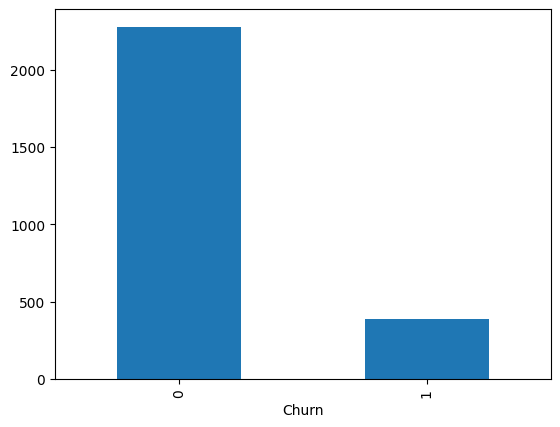

In [15]:
train["Churn"].value_counts().plot(kind="bar")

### Customer churn ratio in categorical variables

In [16]:
ratio_international = train.groupby('International plan').Churn.mean().reset_index()
ratio_international

,International plan,Churn
0,0,0.112688
1,1,0.437037


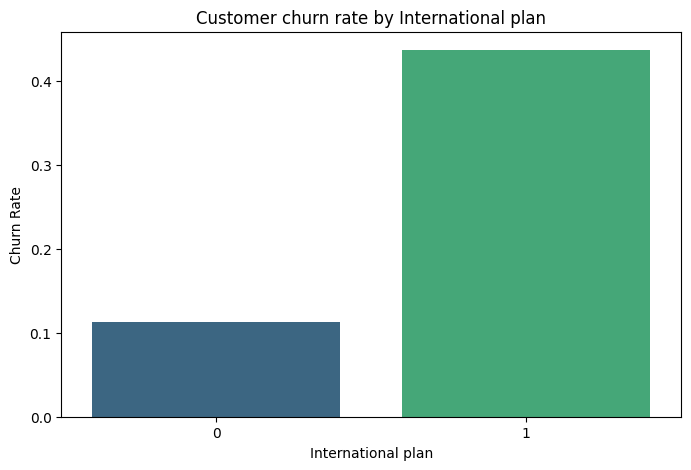

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(x='International plan', y='Churn', hue='International plan', data=ratio_international, palette='viridis', legend=False)
plt.title('Customer churn rate by International plan')
plt.xlabel('International plan')
plt.ylabel('Churn Rate')
plt.show()

In [18]:
ratio_vmail = train.groupby('Voice mail plan').Churn.mean().reset_index()
ratio_vmail

,Voice mail plan,Churn
0,0,0.167098
1,1,0.088677


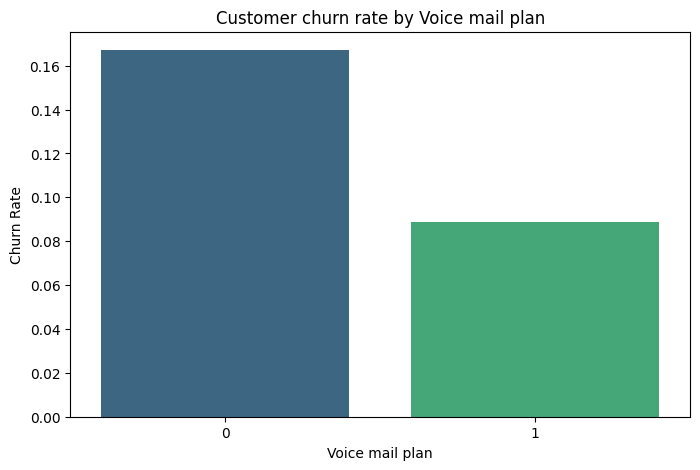

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Voice mail plan', y='Churn', hue='Voice mail plan', data=ratio_vmail, palette='viridis', legend=False)
plt.title('Customer churn rate by Voice mail plan')
plt.xlabel('Voice mail plan')
plt.ylabel('Churn Rate')
plt.show()

In [20]:
ratio_area = train.groupby('Area code').Churn.mean().reset_index()
ratio_area

,Area code,Churn
0,408,0.140508
1,415,0.147951
2,510,0.145803


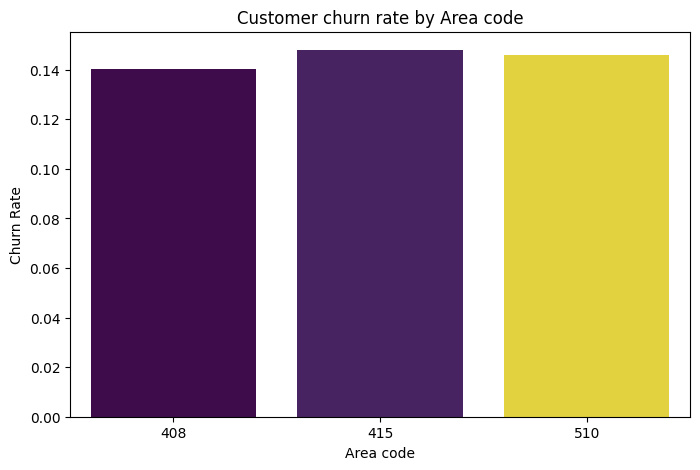

In [21]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Area code', y='Churn', hue='Area code', data=ratio_area, palette='viridis', legend=False)
plt.title('Customer churn rate by Area code')
plt.xlabel('Area code')
plt.ylabel('Churn Rate')
plt.show()

#### Customer churn ratio in numerical variables

In [22]:
ratio_service_calls = train.groupby('Customer service calls').Churn.mean().reset_index()
ratio_service_calls

,Customer service calls,Churn
0,0,0.142342
1,1,0.104762
2,2,0.101974
3,3,0.106322
4,4,0.481203
5,5,0.591837
6,6,0.588235
7,7,0.625000
8,8,1.000000
9,9,1.000000


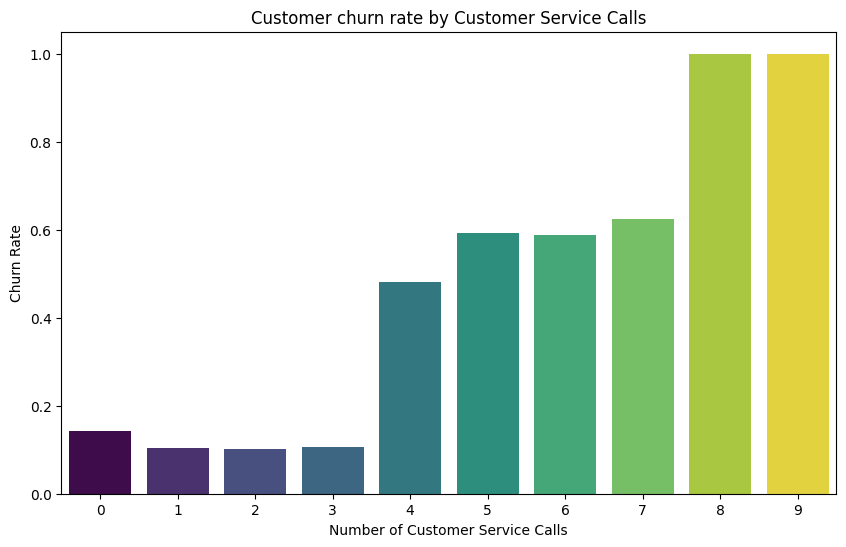

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer service calls', 
            y='Churn', 
            hue='Customer service calls', 
            data=ratio_service_calls, 
            palette='viridis',
            legend=False)
plt.title('Customer churn rate by Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate')
plt.show()

In [24]:
ratio_day_minutes = train.groupby('Total day minutes').Churn.mean().reset_index()
ratio_day_minutes

,Total day minutes,Churn
0,0.0,0.5
1,2.6,0.0
2,7.8,0.0
3,7.9,0.0
4,12.5,0.0
...,...,...
1484,335.5,1.0
1485,337.4,1.0
1486,345.3,1.0
1487,346.8,1.0


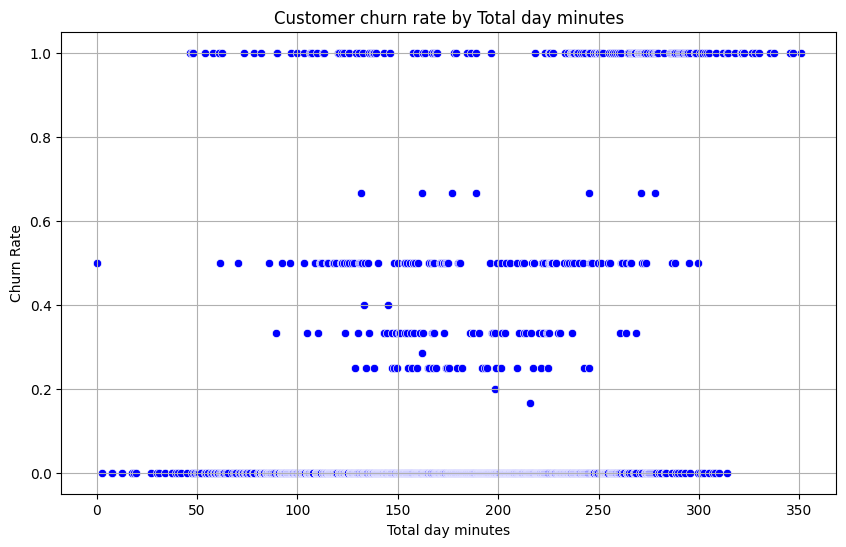

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total day minutes', y='Churn', data=ratio_day_minutes, color='blue')
plt.title('Customer churn rate by Total day minutes')
plt.xlabel('Total day minutes')
plt.ylabel('Churn Rate')
plt.grid(True) 
plt.show()

In [26]:
ratio_day_charge = train.groupby('Total day charge').Churn.mean().reset_index()
ratio_day_charge

,Total day charge,Churn
0,0.00,0.5
1,0.44,0.0
2,1.33,0.0
3,1.34,0.0
4,2.13,0.0
...,...,...
1484,57.04,1.0
1485,57.36,1.0
1486,58.70,1.0
1487,58.96,1.0


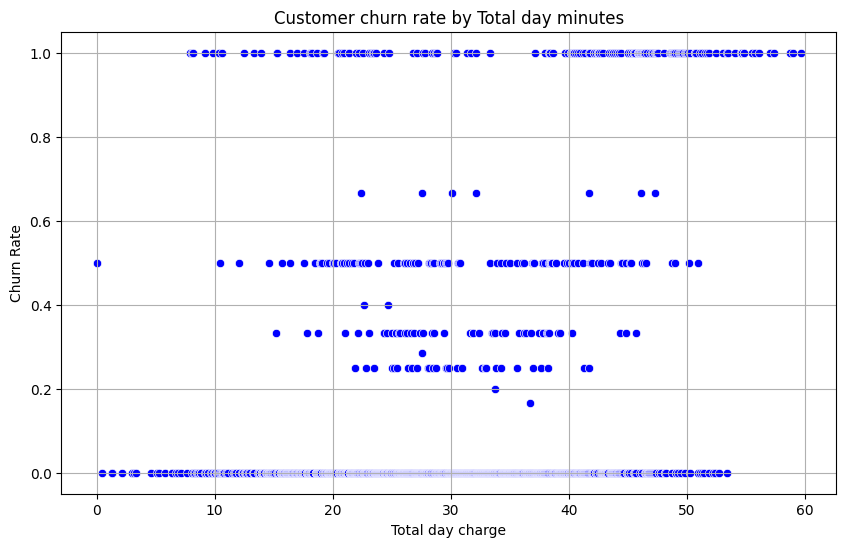

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total day charge', y='Churn', data=ratio_day_charge, color='blue')
plt.title('Customer churn rate by Total day minutes')
plt.xlabel('Total day charge')
plt.ylabel('Churn Rate')
plt.grid(True) 
plt.show()

In [28]:
train.dtypes

Account length              int64
Area code                   int64
International plan          int64
Voice mail plan             int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int32
dtype: object

In [29]:
correlation_matrix = train.corr()
print(correlation_matrix)

                        Account length  Area code  International plan  \
Account length                1.000000  -0.008620            0.024500   
Area code                    -0.008620   1.000000            0.047099   
International plan            0.024500   0.047099            1.000000   
Voice mail plan               0.002448   0.007180            0.002131   
Number vmail messages        -0.002996  -0.000584            0.005858   
Total day minutes             0.002847  -0.023134            0.049550   
Total day calls               0.038862  -0.009629           -0.004277   
Total day charge              0.002843  -0.023130            0.049555   
Total eve minutes            -0.015923   0.000679            0.026616   
Total eve calls               0.018552  -0.018602            0.010277   
Total eve charge             -0.015909   0.000707            0.026623   
Total night minutes          -0.008994  -0.003353           -0.010310   
Total night calls            -0.024007   0.011455  

<Axes: >

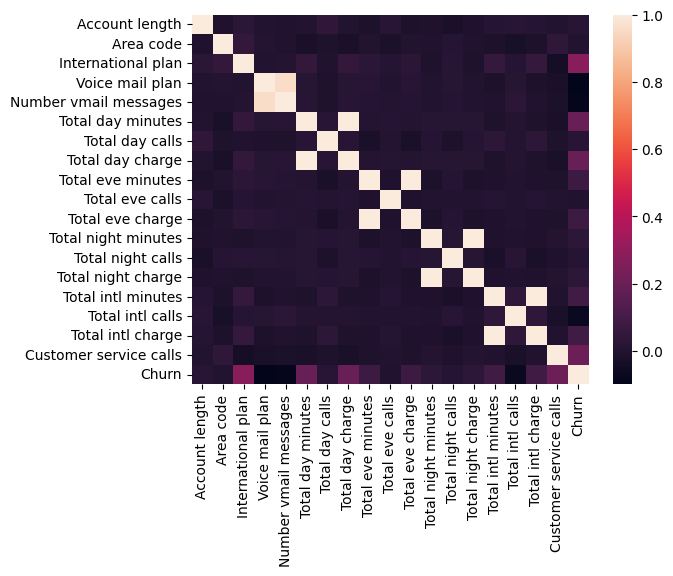

In [30]:
sns.heatmap(train.corr(), fmt='.2g')

### Model training

In [31]:
X_train = train.drop('Churn', axis=1)
X_test = test.drop('Churn', axis=1)
y_train = train['Churn']
y_test = test['Churn']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

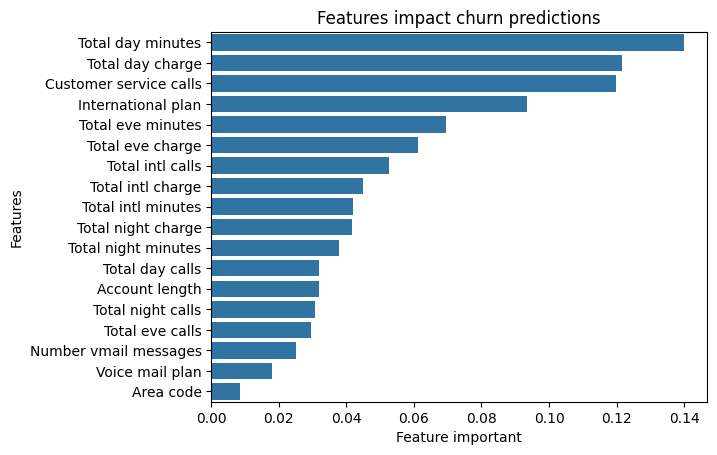

In [32]:
feature_important = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_important, y=feature_important.index)
plt.xlabel('Feature important')
plt.ylabel('Features')
plt.title("Features impact churn predictions")
plt.show()

In [33]:
feature_important.head(10)

Total day minutes         0.139852
Total day charge          0.121551
Customer service calls    0.119737
International plan        0.093472
Total eve minutes         0.069371
Total eve charge          0.061249
Total intl calls          0.052481
Total intl charge         0.044984
Total intl minutes        0.042085
Total night charge        0.041644
dtype: float64

In [34]:
top_features = [
    'Total day minutes', 
    'Total day charge', 
    'Customer service calls', 
    'International plan',
    'Total eve minutes',
    'Total eve charge',
    'Total intl calls',
    'Total intl charge',
    'Total intl minutes',
    'Total night charge'
    ]

In [35]:
X_train_top_features = X_train[top_features]
X_test_top_features = X_test[top_features]

# Retrain the model with new features
model.fit(X_train_top_features, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Predict churn with new features
y_pred = model.predict(X_test_top_features)

### Model evaluation

Accuracy score: 0.92804
Recall score: 0.67368
F1 score: 0.72727
Precision score: 0.79012


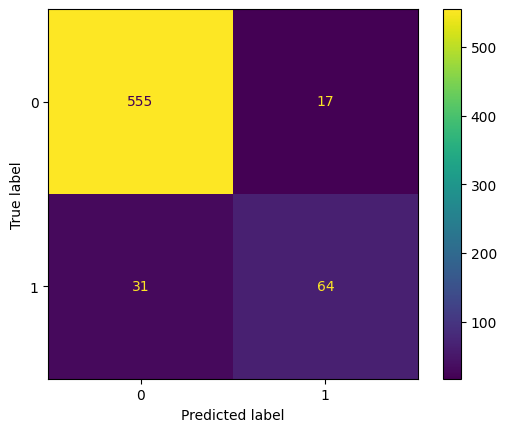

In [37]:
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print(f"Accuracy score: {accuracy:.5f}")
print(f"Recall score: {recall:.5f}")
print(f"F1 score: {f1:.5f}")
print(f"Precision score: {precision:.5f}")

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()